### IMDB rating prediction 

In [5]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import ensemble

from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt

#### Below cell could be ignored as it just used for data analysis purpose

In [6]:
# df.shape

# df.info()

# df.describe().T

# total =df.isnull().sum().sort_values(ascending=False)

# percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
# head = missing_data.head(20)

# col = df['color'].value_counts()
# lan = df['language'].value_counts()
# cou = df['country'].value_counts()
# con = df['content_rating'].value_counts()
# imd = df['imdb_score'].value_counts()
# asp = df['aspect_ratio'].value_counts()
# plot = df['plot_keywords'].value_counts()
# gen = df['genres'].value_counts()
# print(col,lan,cou,con,imd,asp,plot,gen)

# data_groupby_ratings = df.groupby(['imdb_score'])['movie_title'].count()
# data_groupby_ratings.plot()
# print("we can see more than 200 movies have rating of around 6.5")

# sns.set(style="darkgrid")
# plt.figure(figsize = (12, 6))
# sns.countplot(x="language", data = df)
# ax = plt.xticks(rotation=90)

# sns.set(style="darkgrid")
# sns.countplot(x="color", data = df)

# # Lists of numeric data types
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# # Obtain dataframe containing only numeric data
# dfMainNumerics = df.select_dtypes(include=numerics)
# # Creating figure
# plt.figure(figsize=(12, 8))
# sns.heatmap(dfMainNumerics.corr(), annot = True, fmt = ".3f", linewidths = .5, cmap = 'Blues_r');
# plt.title('Main dataframe correlation', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
# plt.show()

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='duration', color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and duration")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='num_user_for_reviews' , color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and num_user_for_reviews")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='actor_1_facebook_likes' , color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and actor_1_facebook_likes")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='director_facebook_likes' , color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and director_facebook_likes")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='facenumber_in_poster' , color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and facenumber_in_poster")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

# from ggplot import *
# p = ggplot(aes(x='imdb_score', y='budget' , color='imdb_score'), data=df) +\
#         geom_point() +\
#         scale_fill_brewer() +\
#         ggtitle("Correlation between imdb_score and budget")
        
# t = theme_gray()
# t._rcParams['font.size'] = 15 # Legend font size
# t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
# t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
# t._rcParams['axes.labelsize'] = 8  # axis label size
# p + t

#### Loading data in DataFrame


In [7]:
file_name = "./movie_metadata.csv"
df = pd.read_csv(file_name)

#### Removing insignificant features



In [8]:
df.drop('movie_imdb_link', axis=1, inplace=True) #unique site links with no co-relation
df.drop('genres', axis=1, inplace=True) # uncleansed features
df.drop('plot_keywords', axis=1, inplace=True) # uncleansed features
df.drop('color', axis=1, inplace=True) # 99% movies are color

#### Explanation given in section 2 and 3.

In [9]:
def preprocess(df, numerical_features, categorical_features):
    # Using pipeline to transfer preprocessed df
    numeric_transformer = Pipeline(steps=[
        # ('imputer', SimpleImputer(strategy='mean')  # updating missing value with mean
        # ('imputer', SimpleImputer(strategy='constant', fill_value=0 )),   updating missing value with 0
        ('imputer', SimpleImputer(strategy='median')), # updating missing value with median
        ('scaler', RobustScaler())]) # Standardization of a dataset

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # updating missing value with missing
        ('ordinal', OrdinalEncoder())]) #Encoding categorical features as an integer array
    # Applying transformers to columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)])

    df = pd.DataFrame(preprocessor.fit_transform(df))

    return df, preprocessor

#### Re-balance using SMOTE

In [10]:
def imbalance_handling(x_train, y_train, x_test, y_test, data, target):
    smote = SMOTE(n_jobs=-1) 
    data, target = smote.fit_sample(data, target)
    x_train, y_train = smote.fit_sample(x_train, y_train)
    x_test, y_test = smote.fit_sample(x_test, y_test)
    data, x_train, x_test = pd.DataFrame(data), pd.DataFrame(x_train), pd.DataFrame(x_test)
    target, y_train, y_test = pd.Series(target), pd.Series(y_train), pd.Series(y_test)
    target, y_train, y_test = target.ravel(), y_train.ravel(), y_test.ravel()
    return x_train, y_train, x_test, y_test, data, target

#### Cross-validation with Feature selection [section 3]

In [11]:
def cross_validation(x_train, y_train, x_test, y_test, full_data, full_target, max_depth, column_names):
    print("\n\n#*************** Running Cross Validations using RandomForestClassifier with feature selection ***************#")

    # cv_classifier = ensemble.ExtraTreesClassifier(max_depth=max_depth, n_jobs=-1)
    # test_classifier = ensemble.ExtraTreesClassifier(max_depth=max_depth, n_jobs=-1)
    cv_classifier = ensemble.RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    test_classifier = ensemble.RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    # cv_classifier = ensemble.GradientBoostingClassifier(max_depth=max_depth)
    # test_classifier = ensemble.GradientBoostingClassifier(max_depth=max_depth)

    cv_classifier.fit(full_data, full_target)
    test_classifier.fit(x_train, y_train)

    features_importance = cv_classifier.feature_importances_
    ser = pd.Series(features_importance)
    ser.index = column_names
    ser.plot(kind='bar')
    plt.title("Feature Importance")
    plt.show()

    # trim feature having importance below than feature_importance
    feature_importance = 0.05

    while len(features_importance[features_importance < feature_importance]) > 0:
        bool_array = features_importance >= feature_importance
        x_train = x_train.loc[:, bool_array]
        x_test = x_test.loc[:, bool_array]
        full_data = full_data.loc[:, bool_array]

        cv_classifier.fit(full_data, full_target)
        test_classifier.fit(x_train, y_train)

        features_importance = cv_classifier.feature_importances_

        print("\n\n#***************Accuracy after Feature selection***************#")

        predicted = test_classifier.predict(x_test)

        print("\nClassification Report - Test:\n" + str(classification_report(y_test, predicted)))
        print("\nConfusion Matrix - Test:\n" + str(confusion_matrix(y_test, predicted)))
        print("\nAfter feature selection - Test Score: %f" % (test_classifier.score(x_test, y_test) * 100) + "%")

        cv_score = model_selection.cross_val_score(cv_classifier, full_data, full_target, cv=10,
                                                   scoring='accuracy', n_jobs=-1)

        print("\nCross-validation Score of RandomForestClassifier: " + str(cv_score * 100))
        print("Mean: %f" % (cv_score.mean() * 100))

#### hyperparameterization [section 3]

In [12]:
def hyperparameter_crossV(feature_train, target_train, feature_test, target_test, full_train, full_target):
    param_grid = [{'n_estimators': list([200, 400, 600, 850, 1100, 1200, 1550, 1850, 2000])}]
    # using gridSearchCV with different ensemble techniques
#     grid_search = model_selection.GridSearchCV( ensemble.RandomForestClassifier(n_jobs=-1),param_grid=param_grid, cv=10, refit=True, n_jobs=-1)
#     grid_search = model_selection.GridSearchCV( ensemble.GradientBoostingClassifier(),param_grid=param_grid, cv=10, refit=True)
#     grid_search = model_selection.GridSearchCV( ensemble.AdaBoostClassifier(),param_grid=param_grid, cv=10, refit=True)
    grid_search = model_selection.GridSearchCV( ensemble.ExtraTreesClassifier(),param_grid=param_grid, cv=10, refit=True)

    grid_search.fit(feature_train, target_train)
    best_score = str(grid_search.best_score_ * 100) # save best score of grid_search
    best_params_ = str(grid_search.best_params_) # save best parameter of grid_search
    score = str(grid_search.score(feature_test, target_test)* 100) # save score of grid_search
    print("Best Score: " + best_score)
    print("Best Params: " + best_params_)
    print("Cross Validation Score:" + score)


#### ** Preprocessing Started **
#### ** Dropping  nonessential values **

In [13]:
# saving imdb scores in scores variable
scores = df['imdb_score']
# taking mean of imdb scores
mean = scores.mean()
# saving values above 2 mean and below 1 mean
df['class'] = scores.apply(lambda x: 2 if x >= mean else 1)

# removing imdb_scores feature to remove bias
df.drop('imdb_score', axis=1, inplace=True)
#  convert categorical features to  integer codes
category_columns = df.select_dtypes(['category']).columns
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)
target = df['class']
df.drop('class', axis=1, inplace=True)
all_column_names = df.columns.values

#### separating numerical and categorical features

In [24]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# running preprocess on numerical and categorical values
df, preprocessor = preprocess(df, numerical_features=numerical_features,
                                categorical_features=categorical_features)

In [15]:
scores_df = pd.DataFrame(None)
series = pd.Series(None)

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.25)
x_train, y_train, x_test, y_test, df, target = imbalance_handling(x_train, y_train, x_test, y_test, df, target)

##### *** Using different Ensemble techniques *** [Section 3]

#### AdaBoostClassifier

In [16]:
test_classifier = ensemble.AdaBoostClassifier()
test_classifier.fit(x_train, y_train)
score = (test_classifier.score(x_test, y_test) * 100)
series['AdaBoostClassifier'] = score
scores_df = scores_df.append(series, ignore_index=True)
print("\nAdaBoost Classifier Test Score: %f" % score + "%")


AdaBoost Classifier Test Score: 75.077160%


#### GradientBoostingClassifier

In [17]:
test_classifier = ensemble.GradientBoostingClassifier()
test_classifier.fit(x_train, y_train)
score = (test_classifier.score(x_test, y_test) * 100)
series['GradientBoostingClassifier'] = score
scores_df = scores_df.append(series, ignore_index=True)
print("\nGradient Boosting Classifier Test Score: %f" % score + "%")


Gradient Boosting Classifier Test Score: 77.237654%


#### RandomForestClassifier

In [18]:
test_classifier = ensemble.RandomForestClassifier(n_jobs=-1)
test_classifier.fit(x_train, y_train)
score = (test_classifier.score(x_test, y_test) * 100)
series['RandomForestClassifier'] = score
scores_df = scores_df.append(series, ignore_index=True)
print("\nRandom Forest Classifier Test Score: %f" % score + "%")

A:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Random Forest Classifier Test Score: 73.996914%


#### BaggingClassifier

In [19]:
test_classifier = ensemble.BaggingClassifier(n_jobs=-1)
test_classifier.fit(x_train, y_train)
score = (test_classifier.score(x_test, y_test) * 100)
series['BaggingClassifier'] = score
scores_df = scores_df.append(series, ignore_index=True)
print("\nBagging Classifier Test Score: %f" % score + "%")


Bagging Classifier Test Score: 73.919753%


#### ExtraTreesClassifier

In [20]:
test_classifier = ensemble.ExtraTreesClassifier(n_jobs=-1)
test_classifier.fit(x_train, y_train)
score = (test_classifier.score(x_test, y_test) * 100)
series['ExtraTreeClassifier'] = score
scores_df = scores_df.append(series, ignore_index=True)
print("\nExtra Tree Classifier Test Score: %f" % score + "%")

A:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Extra Tree Classifier Test Score: 72.299383%


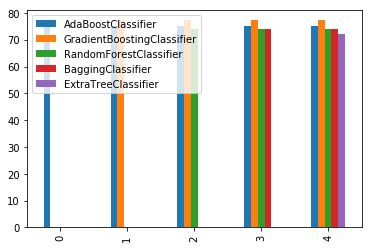

In [21]:
scores_df.plot(kind='bar')
plt.show()

#### Calling cross-validation with feature selection



#*************** Running Cross Validations using RandomForestClassifier with feature selection ***************#


A:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
A:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


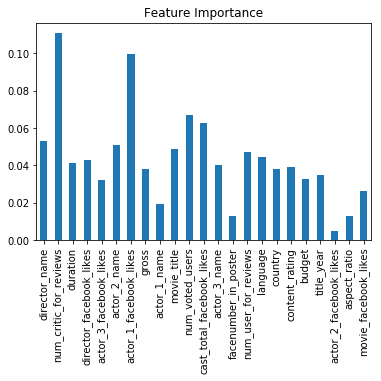



#***************Accuracy after Feature selection***************#

Classification Report - Test:
              precision    recall  f1-score   support

           1       0.72      0.77      0.75       648
           2       0.76      0.70      0.73       648

    accuracy                           0.74      1296
   macro avg       0.74      0.74      0.74      1296
weighted avg       0.74      0.74      0.74      1296


Confusion Matrix - Test:
[[501 147]
 [192 456]]

After feature selection - Test Score: 73.842593%

Cross-validation Score of RandomForestClassifier: [72.72727273 71.81818182 72.90909091 75.3649635  73.54014599 71.35036496
 64.7810219  54.74452555 64.59854015 58.57664234]
Mean: 68.041075


In [22]:
# Removing less significant features and running cross validations using Random Forest
cross_validation(x_train, y_train, x_test, y_test, full_data=df, full_target=target, max_depth=19,
                column_names=all_column_names)

#### Calling hyper-parameter [Section 3]

In [23]:
print("#**************** hyperparameter cross-Validation output ****************#")
hyperparameter_crossV(x_train, y_train, x_test, y_test, df, target)

#**************** hyperparameter cross-Validation output ****************#
Best Score: 80.0
Best Params: {'n_estimators': 600}
Cross Validation Score:78.62654320987654
